## Exercícios de Pesquisa Operacional

Exercícios criados projetados para testar competências essenciais, tais como:
* Otimização linear;
* Tomada de decisão em cenários reais; e
* Estratégias práticas de logística e gestão.

### Prepara o ambiente de execução

In [3]:
!pip install pulp | tail -1
!pip install pandas | tail -1
!pip install numpy | tail -1

import pulp
import pandas as pd
import numpy as np

### Exercício 2: Gestão de Estoques

Uma filial deseja otimizar o gerenciamento de estoque de um produto popular. A demanda mensal média é de 4.000 unidades, o custo fixo de reposição é de R\$120 por pedido, e o custo de manutenção anual do estoque por unidade é de R\$8. Considerando que o tempo médio de reposição é de 15 dias, calcule:

1. A Quantidade Económica de Encomenda (EOQ).
2. O ponto de pedido.
3. O custo anual total do estoque.

#### Resolução 2.1 - Quantidade Económica de Encomenda

A Quantidade Economica de Encomenda (EOQ) é a quantidade ideal de pedido que minimiza os custos totais de estoque, considerando tanto os custos de manutenção quanto os custos fixos de pedido. A EOQ é dada pela equação:

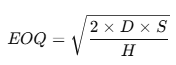

Onde:
* D: Demanda anual do produto (unidades)
* S: Custo fixo de reposição por pedido
* H: Custo anual de manutenção por unidade  

Para uma rápida compreensão do que este número representa pode ser encontrada em [wikipedia.org/Economic_order_quantity](https://pt.wikipedia.org/wiki/Economic_order_quantity)

In [13]:
# dados do problema
demanda_mensal = 4000
custo_reposicao = 120
custo_manutencao = 8
tempo_reposicao = 15

dias_por_mes = 30 # considerar apenas os dias de funcionamento
demanda_anual = demanda_mensal * 12

# Calculo do EOQ
EOQ = np.sqrt((2 * demanda_anual * custo_reposicao) / custo_manutencao)

print(f"A quantidade economica de encomenda (EOQ) é de {EOQ} unidades")

A quantidade economica de encomenda (EOQ) é de 1200.0 unidades


#### Resolução 2.2 - Ponto de Pedido

O Ponto de Pedido é o momento ideal para uma empresa fazer uma nova compra de estoque, e é dado pela equação:

  PP = d * T

Onde:
* d: Demanda diária média
* T: Tempo para reposição (dias)


In [14]:
# demanda diária
demanda_diaria = demanda_mensal / dias_por_mes

# ponto de pedido
ponto_pedido = demanda_diaria * tempo_reposicao

print(f"O ponto de pedido é de {ponto_pedido:.0f} unidades")

O ponto de pedido é de 2000 unidades


#### Resolução 2.3 - Custo Anual Total

O Custo anual total é dado por:

Custo Total = Custo de Pedidos + Custo de Manutenção

* Custo de Pedidos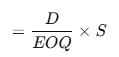

* Custo de Manutenção Total 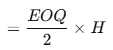

Onde:
* D: Demanda anual do produto (unidades)
* S: Custo fixo de reposição por pedido
* H: Custo anual de manutenção por unidade



In [15]:
custo_pedidos = ( demanda_anual / EOQ ) * custo_reposicao
custo_manutencao_total = ( EOQ / 2 ) * custo_manutencao

custo_total = custo_pedidos + custo_manutencao_total

print(f"O custo total anual é de R$ {custo_total:.2f}")
print(f"\tO custo anual de pedidos é de R$ {custo_pedidos:.2f}")
print(f"\tO custo anual de manutenção é de R$ {custo_manutencao_total:.2f}")

O custo total anual é de R$ 9600.00
	O custo anual de pedidos é de R$ 4800.00
	O custo anual de manutenção é de R$ 4800.00


*Obs: No ponto ótimo, os custos com pedidos e com manutençao se equivalem*